# Practical 03
## Aim: 
    Compute the following node level measures: (i) Density; (ii) Degree; (iii) Reciprocity; (iv) Transitivity; (v) Centralization; (vi) Clustering.

In [1]:
library(igraph)	


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### 1)Density

In [2]:
g <- graph.formula(1-2, 1-3, 2-3, 2-4, 3-5, 4-5, 4-6,4-7, 5-6, 6-7)

In [3]:
nodes <- read.csv("/kaggle/input/network-analysis-data-from-various-sources/InputFileNodes.csv", header=T, , as.is=T)
links <- read.csv("/kaggle/input/network-analysis-data-from-various-sources/InputFileEdges.csv", header=T, as.is=T)
net <- graph.data.frame(d=links, vertices=nodes, directed=T)

In [4]:
vcount(g) 

[1] 7

In [5]:
ecount(g) 

[1] 10

In [6]:
ecount(g)/(vcount(g)*(vcount(g)-1)/2)

[1] 0.4761905

### 2) Degree

In [7]:
degree(net)

s01 s02 s03 s04 s05 s06 s07 s08 s09 s10 s11 s12 s13 s14 s15 s16 s17 
 10   7  13   9   5   6   5   6   5   5   3   6   4   4   6   3   5

### 3)Reciprocity

[1] 0.5

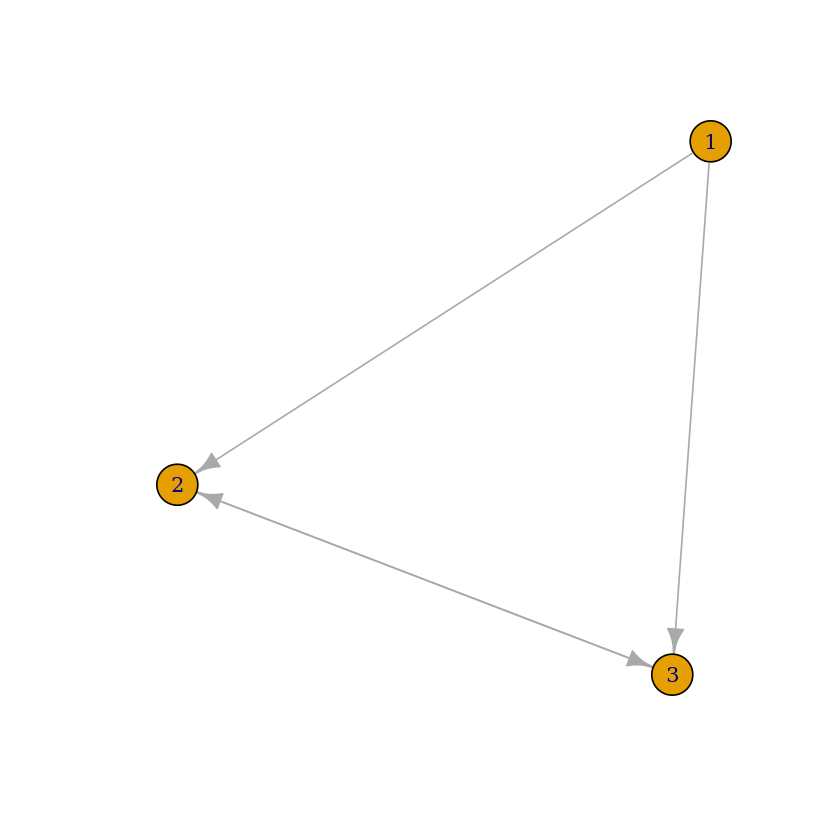

In [8]:
dg <- graph.formula(1-+2, 1-+3, 2++3)
plot(dg)
reciprocity(dg)

### 	Formula 

In [9]:
dyad.census(dg)

$mut
[1] 1

$asym
[1] 2

$null
[1] 0

In [10]:
2*dyad.census(dg)$mut/ecount(dg)

[1] 0.5

### 4)Transitivity

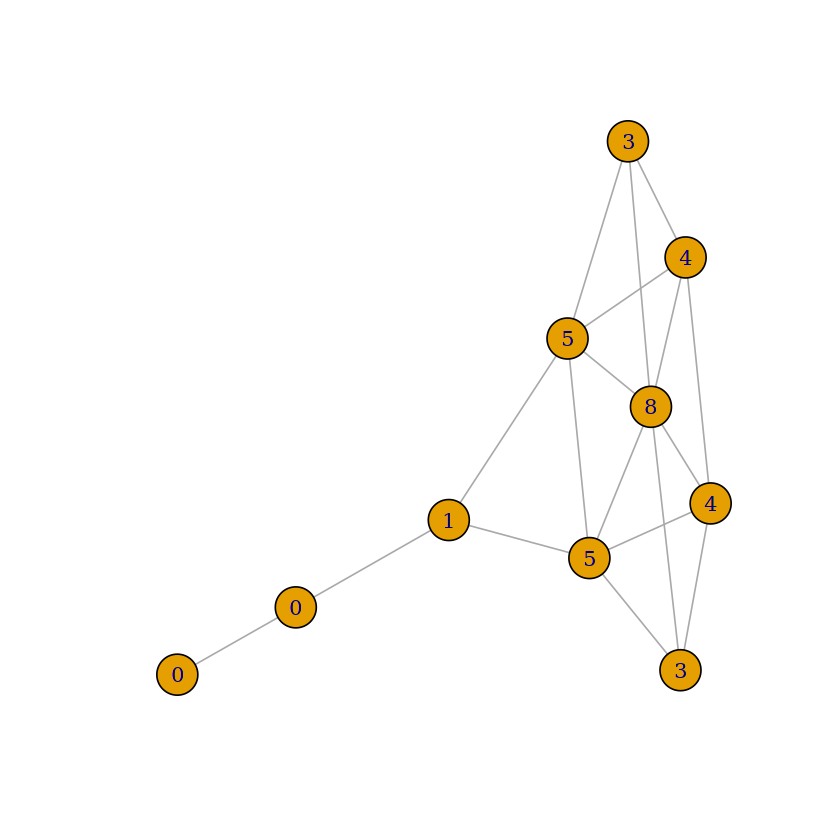

In [11]:
kite <- graph.famous("Krackhardt_Kite")
atri <- adjacent.triangles(kite)
plot(kite, vertex.label=atri)


In [12]:
transitivity(kite, type="local")

[1] 0.6666667 0.6666667 1.0000000 0.5333333 1.0000000 0.5000000 0.5000000
 [8] 0.3333333 0.0000000       NaN

#### Formula 

In [13]:
adjacent.triangles(kite) / (degree(kite) * (degree(kite)-1)/2)

[1] 0.6666667 0.6666667 1.0000000 0.5333333 1.0000000 0.5000000 0.5000000
 [8] 0.3333333 0.0000000       NaN

### 5)Centralization
	Degree of centrality 

In [14]:
centralization.degree(net, mode="in", normalized=T)

$res
 [1] 5 3 6 4 1 4 1 2 4 4 3 3 2 2 2 1 4

$centralization
[1] 0.1875

$theoretical_max
[1] 272

	Closeness Centralization 

In [15]:
closeness(net, mode="all", weights=NA)
centralization.closeness(net, mode="all", normalized=T)

s01        s02        s03        s04        s05        s06        s07 
0.03333333 0.03030303 0.04166667 0.03846154 0.03225806 0.03125000 0.03030303 
       s08        s09        s10        s11        s12        s13        s14 
0.02857143 0.02564103 0.02941176 0.03225806 0.03571429 0.02702703 0.02941176 
       s15        s16        s17 
0.03030303 0.02222222 0.02857143

$res
 [1] 0.5333333 0.4848485 0.6666667 0.6153846 0.5161290 0.5000000 0.4848485
 [8] 0.4571429 0.4102564 0.4705882 0.5161290 0.5714286 0.4324324 0.4705882
[15] 0.4848485 0.3555556 0.4571429

$centralization
[1] 0.3753596

$theoretical_max
[1] 7.741935

	Betweeness Centrality 

In [16]:
betweenness(net, directed=T, weights=NA)
edge.betweenness(net, directed=T, weights=NA)
centralization.betweenness(net, directed=T, normalized=T)

s01        s02        s03        s04        s05        s06        s07 
 26.857143   6.238095 126.511905  92.642857  13.000000  20.333333   1.750000 
       s08        s09        s10        s11        s12        s13        s14 
 21.000000   1.000000  15.000000   0.000000  33.500000  20.000000   4.000000 
       s15        s16        s17 
  5.666667   0.000000  58.500000

[1]  6.619048  6.619048 11.785714  8.333333  6.500000 11.166667 21.333333
 [8]  4.250000  4.250000 16.000000 64.476190  9.500000  3.261905  3.261905
[15] 15.000000  1.000000 15.000000 17.000000 16.750000  2.000000  1.250000
[22]  8.000000 12.500000  4.000000 26.000000 18.000000 14.500000 17.000000
[29]  7.500000  4.500000  2.738095 23.000000 11.000000 31.000000  9.011905
[36] 18.000000 28.500000  3.000000  6.500000 17.000000  8.666667 74.500000
[43] 11.750000 34.000000  4.500000  6.333333  8.809524  5.333333  3.000000
[50] 28.000000 10.000000

$res
 [1]  26.857143   6.238095 126.511905  92.642857  13.000000  20.333333
 [7]   1.750000  21.000000   1.000000  15.000000   0.000000  33.500000
[13]  20.000000   4.000000   5.666667   0.000000  58.500000

$centralization
[1] 0.4439329

$theoretical_max
[1] 3840

	Eigenvector centrality 

In [17]:
centralization.evcent(net, directed=T, normalized=T)

$vector
 [1] 0.7771858 0.5695231 1.0000000 0.8214144 0.3061151 0.6051851 0.1033953
 [8] 0.3377660 0.4748366 0.6574603 0.6271016 0.6386998 0.2650548 0.2271665
[15] 0.3316148 0.1852563 0.5745507

$value
[1] 3.266745

$options
$options$bmat
[1] "I"

$options$n
[1] 17

$options$which
[1] "LR"

$options$nev
[1] 1

$options$tol
[1] 0

$options$ncv
[1] 0

$options$ldv
[1] 0

$options$ishift
[1] 1

$options$maxiter
[1] 3000

$options$nb
[1] 1

$options$mode
[1] 1

$options$start
[1] 1

$options$sigma
[1] 0

$options$sigmai
[1] 0

$options$info
[1] 0

$options$iter
[1] 7

$options$nconv
[1] 1

$options$numop
[1] 30

$options$numopb
[1] 0

$options$numreo
[1] 20


$centralization
[1] 0.5311046

$theoretical_max
[1] 16

## 6) Clustering

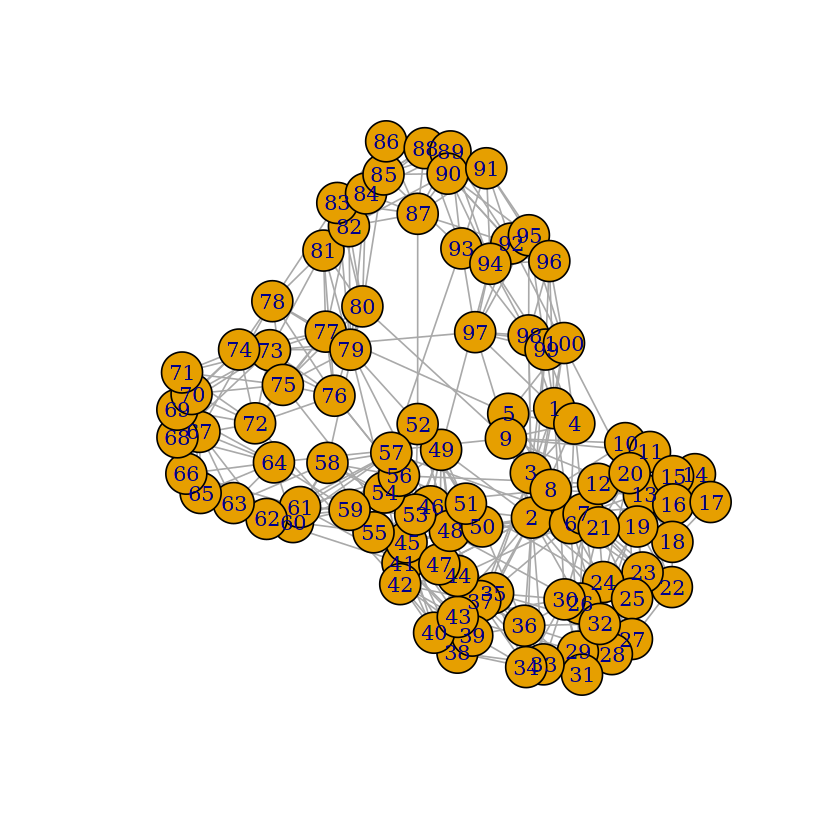

In [18]:
 # let's generate two networks and merge them into one graph.
g2 <- barabasi.game(50, p=2, directed=F)
g1 <- watts.strogatz.game(1, size=100, nei=5, p=0.05)
g <- graph.union(g1,g2)
 
#Let's remove multi-edges and loops
g <- simplify(g)
plot(g)